#                                             COMPUTING ASSIGNMENT - 3

In this assignment, we aim to explore the concept of Convolutional Neural Networks (CNNs) and their suitability for image classification tasks. We will understand the significance of automatic feature learning in image classification and how CNNs excel in utilizing spatial relationships within images.
To Do:
    a. You will have to to successfully run this notebook and understand the steps.
    b. Make any modifications/additions to demonstrate that the model trained correctly, by using an image from the 'Test' dataset and verify that it was correctly classified.
    c. Take an image of a your own handwritten digit (possibly in a 5cm x 5cm sheet) and verify if the model is able to classify it correctly. If it fails, justify the reason.
    d. Take images of a specific digit, one from the 'train' and 'test' set. Extract the SIFT features for these digits. Compare them using their SIFT features and verify if they match. Justify.
    e. Create a copy of this notebook and now use the CIFAR10 dataset and modify the template (keep the basic model same as 'Sequential', but can make other changes) as necessary to perform classification on this dataset. Show that the trained model is able to classify the objects from the given 'Train' set. Does it work for your own image (not necessarily in the dataset) ?

### A basic CNN architecture

CNNs are a class of deep learning models designed to automatically and adaptively learn spatial hierarchies of features from input data, particularly images. They are characterized by their ability to learn directly from pixel data with minimal preprocessing. A CNN employs spatial convolution for processing. This operation calculates a sum of products between pixel values and a set of kernel weights, applied at each spatial location in the input image. The result at each location is a scalar value, analogous to the output of a neuron in a fully connected neural network. Adding a bias and applying an activation function completes the analogy with fully connected networks.

![cnn.png](attachment:cnn.png)

A typical CNN architecture consists of several layers:

Convolutional Layer: These layers apply convolution operations to the input data, which involves sliding a small filter (kernel) over the input to detect patterns and features.

Pooling Layer: Pooling layers reduce the spatial dimensions of the input by taking the maximum or average value within a small window. This helps reduce the computational load and focuses on the most important features.

Fully Connected Layer (Dense Layer): These layers are traditional neural network layers that take the output of the previous layers and produce the final classification or regression output.

### Visualizing feature maps after convolution and pooling operations

We will try to visualize the features in each layer of a CNN using the MNIST dataset

In [67]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

Next, we load the CIFAR10 dataset and view a few samples from it

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [69]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


truck horse   car   dog


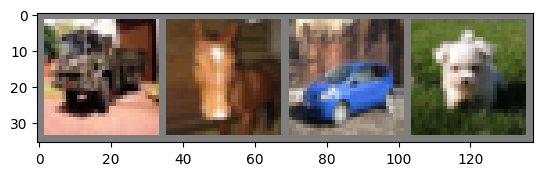

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
   img = img / 2 + 0.5    # unnormalize
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


Now we define a CNN

In [71]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Define the loss function and optimizer

In [72]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the network

In [73]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.257
[1,  4000] loss: 1.907
[1,  6000] loss: 1.710
[1,  8000] loss: 1.564
[1, 10000] loss: 1.527
[1, 12000] loss: 1.480
[2,  2000] loss: 1.434
[2,  4000] loss: 1.363
[2,  6000] loss: 1.366
[2,  8000] loss: 1.337
[2, 10000] loss: 1.303
[2, 12000] loss: 1.305
Finished Training


Test the network for 2 passes

GroundTruth:    cat  ship  ship plane


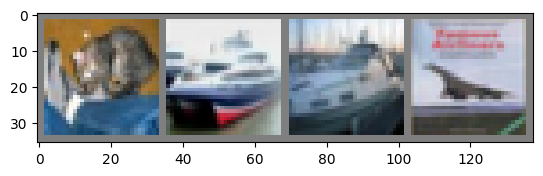

In [74]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [75]:
outputs = net(images)

In [76]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [77]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Now, check for the whole dataset

In [78]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 70 %
Accuracy of  bird : 40 %
Accuracy of   cat : 43 %
Accuracy of  deer : 36 %
Accuracy of   dog : 36 %
Accuracy of  frog : 61 %
Accuracy of horse : 67 %
Accuracy of  ship : 73 %
Accuracy of truck : 47 %


Check for an external image

In [80]:
from PIL import Image

# Load the image
image = Image.open('external_test.jpg')

In [102]:
from torchvision import transforms

# Define the preprocessing steps
preprocess = transforms.Compose([
   transforms.Resize((32, 32)), # Resize to the input size expected by the model
   transforms.ToTensor(), # Convert the image to a tensor
   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image
])

# Preprocess the image
input_image = preprocess(image)


In [103]:
# Add an extra dimension for the batch size
input_image = input_image.unsqueeze(0)

In [104]:
# Create a tensor
tensor = torch.empty(3, 4, 5)

# Get the size of the tensor
size = tensor.size()

# Convert the size to a list
size_list = list(size)

print(size_list) # Output: [3, 4, 5]


[3, 4, 5]


In [107]:
# Pass the image to the model
output = net(input_image)

# Get the class with the highest probability
predicted_class = torch.argmax(output, dim=1)


print('Predicted: ', ' '.join('%5s' % classes[predicted_class]))




Predicted:      c a r


The model has predicted the correct class hence it works well.